1.n_components = 2 olarak ayarlayarak kalp hastalığı verilerine GMM uygulayın. Çözümünüz için ARI ve siluet skorlarına bakın ve önceki derslerde k-means ve hiyerarşik kümeleme çözümleriyle karşılaştırın. Hangi algoritma daha iyi performans gösteriyor?

2.Scikit-learn ile GMM uygulanırken kullanılan parametrelerden biri de covariance_type'dir. Bu parametre, kullanılacak kovaryans parametrelerinin türünü belirler. Özellikle, belirtebileceğiniz dört tür vardır:

full: Bu varsayılandır. Her bileşenin kendi genel kovaryans matrisi vardır.

tied: Tüm bileşenler aynı genel kovaryans matrisini paylaşır.

diag: Her bir bileşenin kendi çapraz kovaryans matrisi vardır.

spherical: Her bir bileşenin kendine ait tek bir varyansı vardır.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_heart = pd.read_csv("heart.csv")

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df_heart.iloc[:, :13]
y = df_heart.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
#standardizasyon

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
gmm_cluster = GaussianMixture(n_components=2,random_state=123)
clusters = gmm_cluster.fit_predict(X_std)


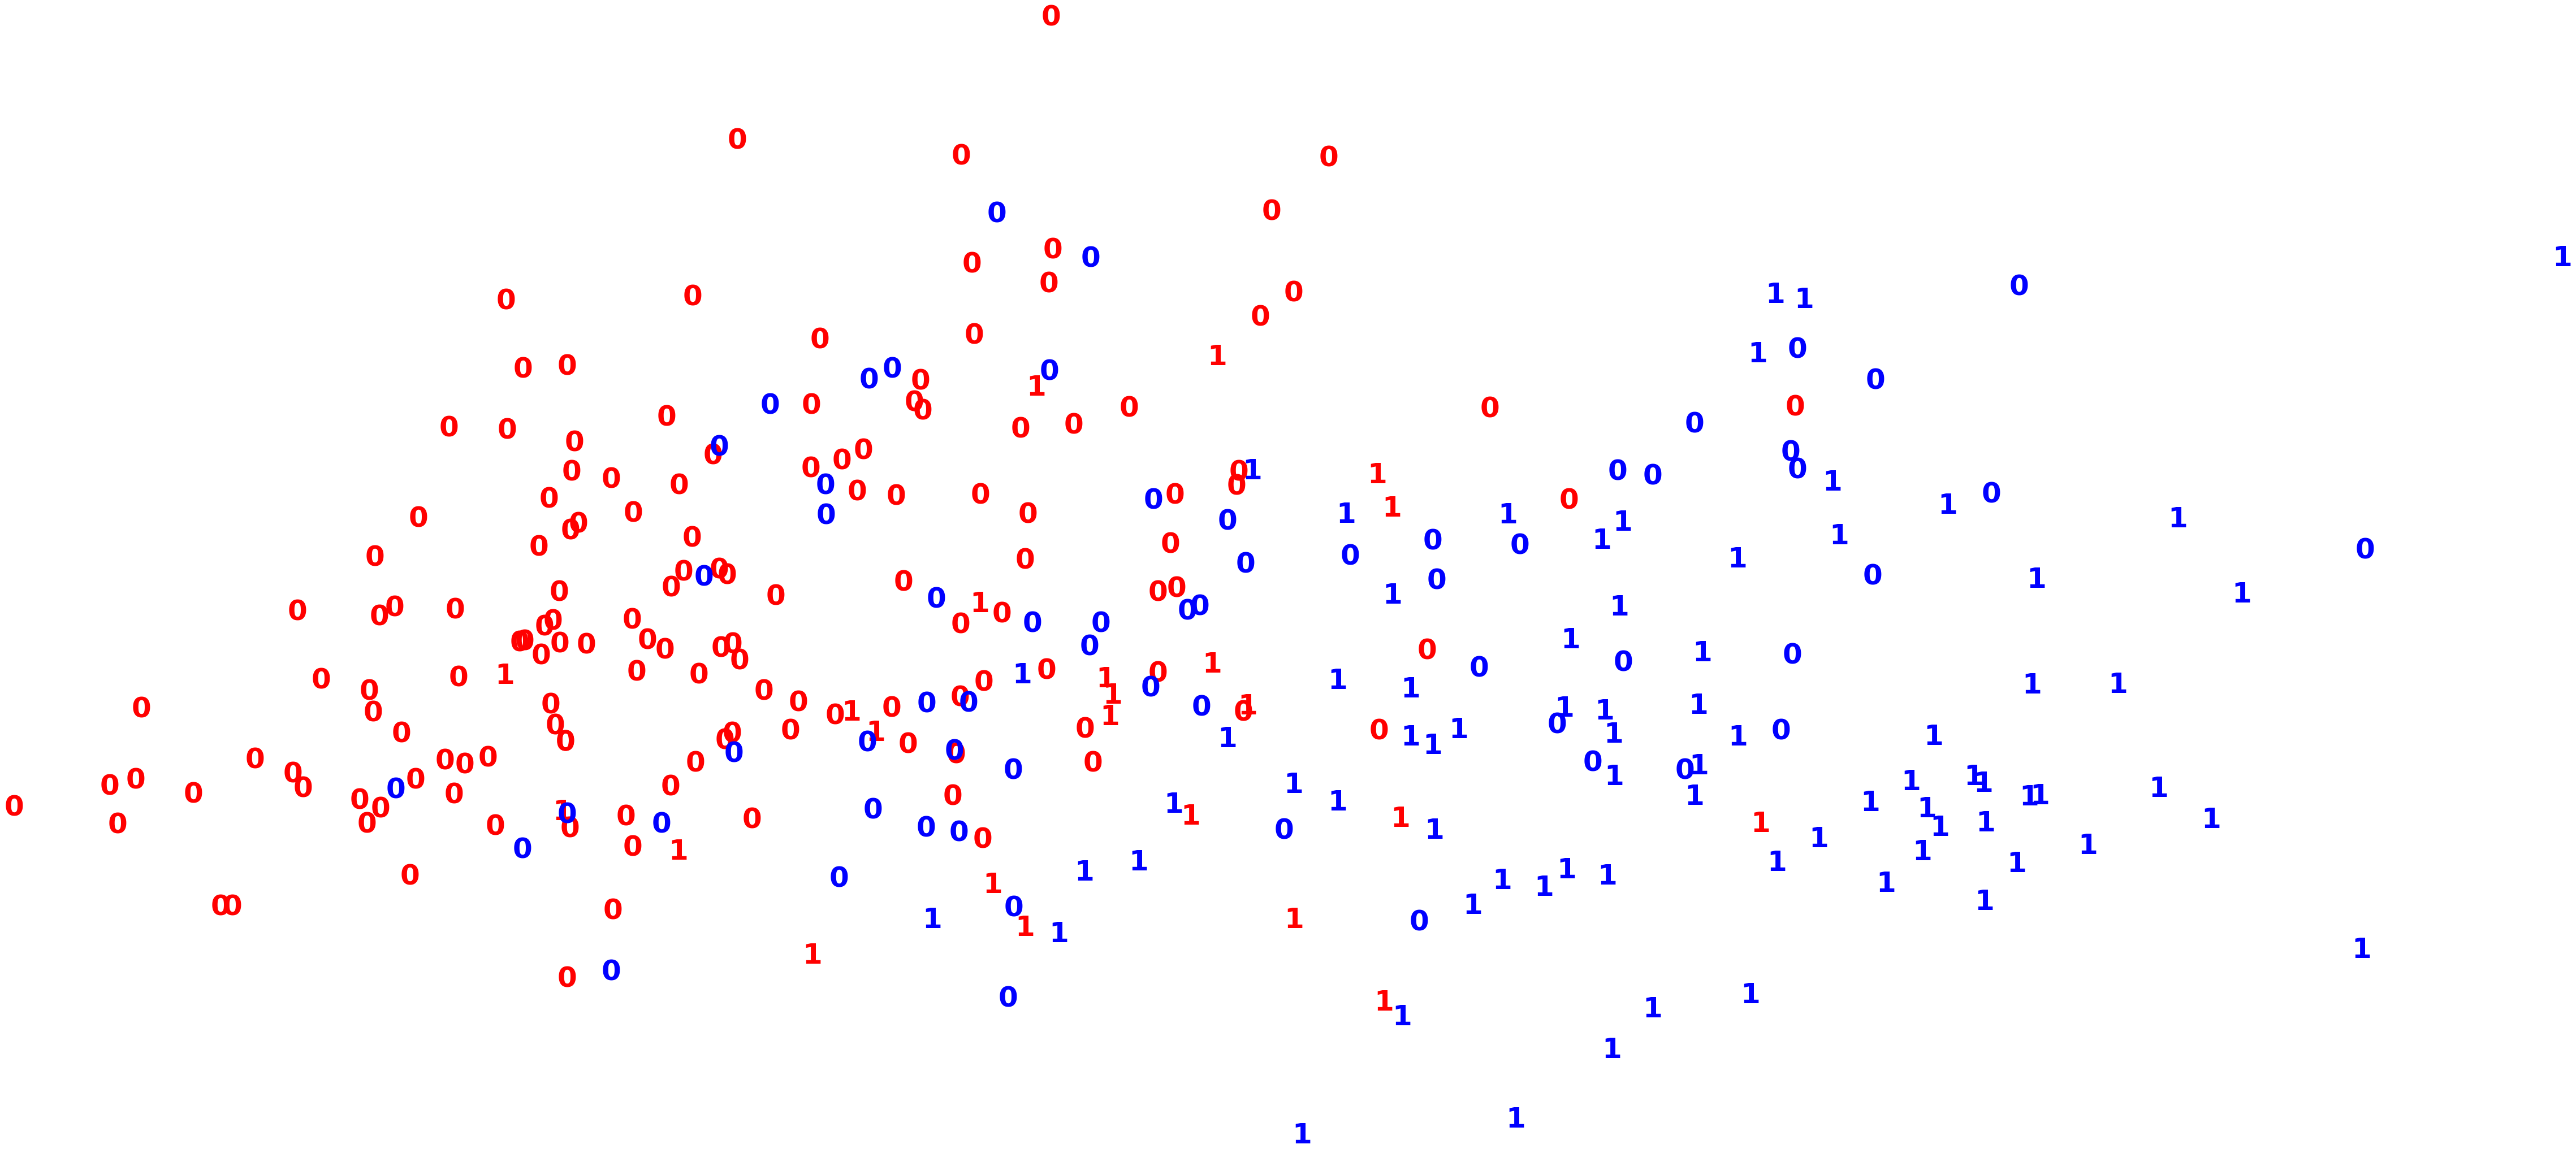

In [6]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

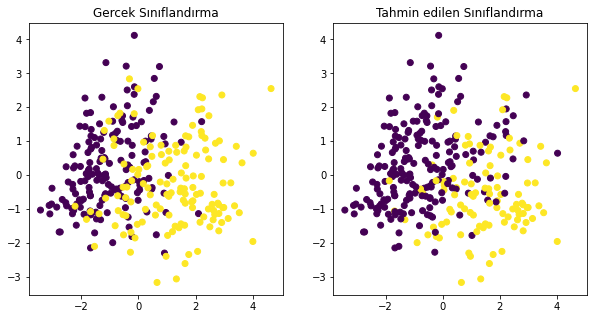

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(pca.T[0],pca.T[1],c=y)
plt.title('Gercek Sınıflandırma')
plt.subplot(122)
plt.scatter(pca.T[0],pca.T[1],c=clusters)
plt.title('Tahmin edilen Sınıflandırma')
plt.show()

In [8]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.190
GMM çözümünün siluet skoru                  : 0.135


In [9]:
#k-means ile karsilastırma:
    
kümeler_kmeans = KMeans(n_clusters=2,random_state=123).fit_predict(X_std)

print("Kmeans Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler_kmeans)))
print("Kmeans Kümeleme için Siluet Katsayısı: {}"
      .format(metrics.silhouette_score(X_std, kümeler_kmeans, metric='cosine')))

Kmeans Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.3951165387976023
Kmeans Kümeleme için Siluet Katsayısı: 0.25492129541848046


In [10]:
#hiyerarsik kümeleme ile karsılastırma:

agg_küme_complete = AgglomerativeClustering(linkage="complete",affinity="manhattan",n_clusters=2)

kümeler_comp = agg_küme_complete.fit_predict(X_std)

print("Hiyerarsik Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler_comp)))
print("Hiyerarsik Kümeleme için Siluet Katsayısı: {}"
      .format(metrics.silhouette_score(X_std, kümeler_comp, metric='cosine')))

Hiyerarsik Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.3388492364931911
Hiyerarsik Kümeleme için Siluet Katsayısı: 0.23014630728547703


In [12]:
#DBSCAN  ile karsılastırma:

dbscan_cluster = DBSCAN(eps=1,min_samples=1)
clusters = dbscan_cluster.fit_predict(X_std)

print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.0005630036745304687
DBSCAN çözümünün siluet skoru: 0.029961327114175956


Görüldüğü gibi bu veri seti için GMM modeli ,DBSCAN'den yüksek performans göstermiş olsa da  K-means ve Hiyerarsik kümelemeden daha düşük performans göstermiştir.

In [11]:
#simdi de GMM parametrelerini inceleyelim:

covariance_types=['full','tied','diag','spherical']

for i,j in enumerate(covariance_types):
    
    gmm_cluster_ = GaussianMixture(n_components=2,covariance_type=j,random_state=123)
    clusters_ = gmm_cluster_.fit_predict(X_std) 

    print("GMM covariance_type={} için Düzeltilmiş Rand Endeksi (ARI): {:.5f}"
      .format(j,metrics.adjusted_rand_score(y, clusters_)))
    print("GMM covariance_type={} için siluet skoru                  : {:.5f}"
      .format(j,metrics.silhouette_score(X_std, clusters_, metric='euclidean')))

GMM covariance_type=full için Düzeltilmiş Rand Endeksi (ARI): 0.18956
GMM covariance_type=full için siluet skoru                  : 0.13546
GMM covariance_type=tied için Düzeltilmiş Rand Endeksi (ARI): 0.18956
GMM covariance_type=tied için siluet skoru                  : 0.13546
GMM covariance_type=diag için Düzeltilmiş Rand Endeksi (ARI): 0.18956
GMM covariance_type=diag için siluet skoru                  : 0.13546
GMM covariance_type=spherical için Düzeltilmiş Rand Endeksi (ARI): 0.17837
GMM covariance_type=spherical için siluet skoru                  : 0.10749


covariance_type; full,tied ve diag için eşit değerler döndürdü fakat covariance_type=spherical en düşük ARI ve siluet skor değerini döndürdü. 